In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('base/Crime_Data_Treated.csv')
pd.set_option('display.max_columns', None)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LAT,LON,YearMonth,Periodo
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,2020-01,Noite
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,2020-01,Madrugada
2,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,34.1685,-118.4019,2020-01,Tarde
3,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,IC,Invest Cont,34.2198,-118.4468,2020-01,Madrugada
4,200100501,01/02/2020 12:00:00 AM,2020-01-01,30,Central,"RAPE, FORCIBLE",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534,2020-01,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569108,231510379,05/29/2023 12:00:00 AM,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,OTHER PREMISE,NaN,IC,Invest Cont,34.1667,-118.3643,2023-05,Manhã
569109,231604807,01/27/2023 12:00:00 AM,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,IC,Invest Cont,34.2466,-118.4054,2023-01,Tarde
569110,231606525,03/22/2023 12:00:00 AM,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,34.2790,-118.4116,2023-03,Manhã
569111,231210064,04/12/2023 12:00:00 AM,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,33.9841,-118.2915,2023-04,Tarde


In [4]:
plt.rcdefaults()

In [5]:
# Configuração global do Matplotlib
plt.rcParams.update({
    'figure.figsize': (10, 6),  # Tamanho padrão da figura (largura, altura)
    'axes.titlesize': 'large',  # Tamanho do título dos eixos
    'axes.labelsize': 'medium',  # Tamanho dos rótulos dos eixos
    'xtick.labelsize': 'small',  # Tamanho dos rótulos do eixo x
    'ytick.labelsize': 'small',  # Tamanho dos rótulos do eixo y
    'lines.linewidth': 2,  # Largura das linhas
    'lines.color': '#4B2E2F',  # Cor das linhas (marrom escuro)
    'grid.linestyle': '-',  # Estilo da linha da grade
    'grid.alpha': 0.3,  # Transparência da grade
    'axes.edgecolor': '#4B2E2F',  # Cor das bordas dos eixos (marrom escuro)
    'axes.facecolor': '#FFFFFF',  # Cor de fundo dos eixos (branco)
    'figure.facecolor': '#FFFFFF',  # Cor de fundo da figura (branco)
    'axes.labelcolor': '#333333',  # Cor dos rótulos dos eixos (cinza escuro)
    'axes.titleweight': 'normal',  # Peso do título dos eixos (normal, não negrito)
    'axes.spines.bottom': True,  # Manter linha inferior dos eixos
    'axes.spines.left': True,  # Manter linha esquerda dos eixos
    'axes.spines.top': False,  # Remover linha superior dos eixos
    'axes.spines.right': False,  # Remover linha direita dos eixos
    'axes.grid': True,  # Habilitar linhas de grid por padrão
})

# Definir a paleta do Seaborn
sns.set_palette("muted")  


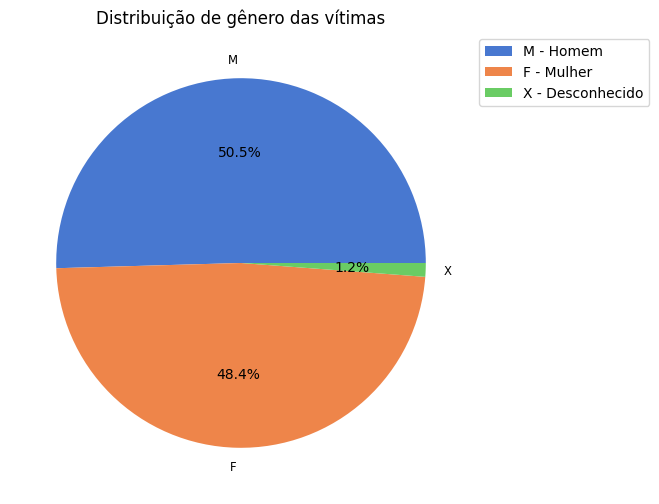

In [6]:
# Distribuição de gênero das vítimas
fig, ax = plt.subplots()
gender_counts = df['Vict Sex'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribuição de gênero das vítimas')
ax.legend(
    labels=['M - Homem', 'F - Mulher', 'X - Desconhecido'],  
    loc='upper left',  
    bbox_to_anchor=(1, 1)  
)
plt.show()

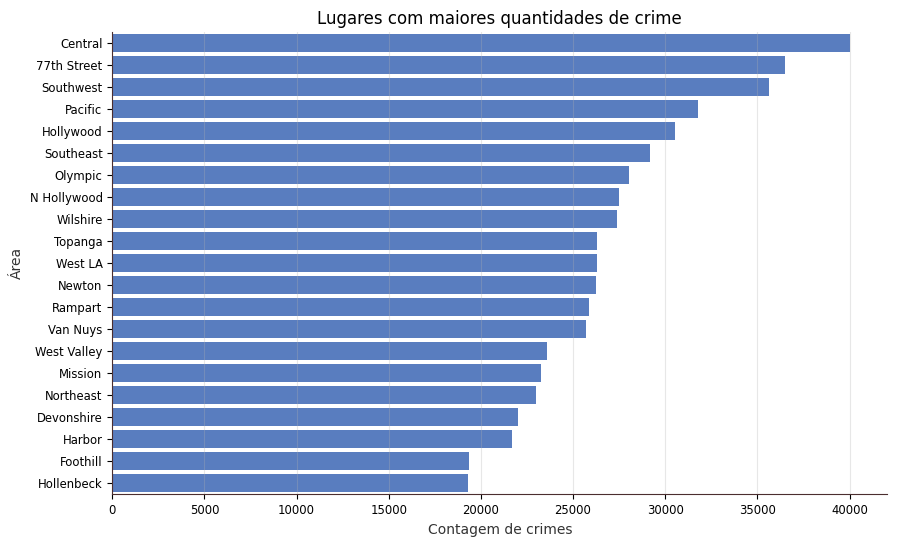

In [7]:
# Lugares com maiores quantidades de crimes
fig, ax = plt.subplots()
sns.countplot(data = df, y = "AREA NAME", order=df['AREA NAME'].value_counts().index, ax=ax)
plt.title('Lugares com maiores quantidades de crime')
ax.set_xlabel('Contagem de crimes')
ax.set_ylabel('Área')
plt.show()

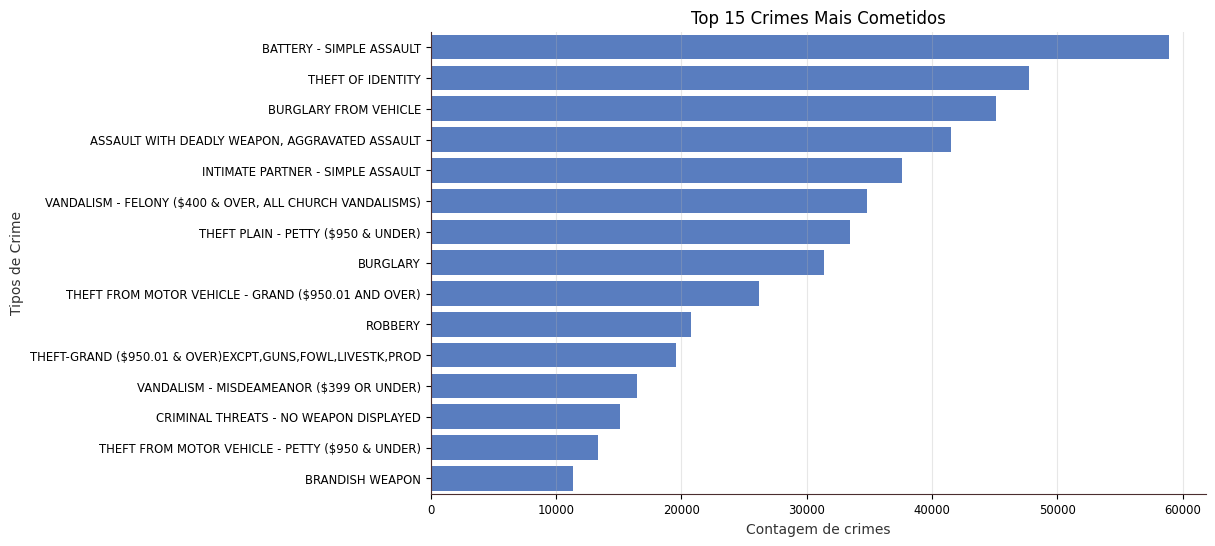

In [8]:
# Lugares com maiores quantidades de crimes
fig, ax = plt.subplots()
crime_counts = df['Crm Cd Desc'].value_counts().head(15)
crime_counts_df = crime_counts.reset_index()
crime_counts_df.columns = ['Crm Cd Desc', 'Count']  

sns.barplot(data=crime_counts_df, y='Crm Cd Desc', x='Count')

plt.title('Top 15 Crimes Mais Cometidos')
ax.set_xlabel('Contagem de crimes')
ax.set_ylabel('Tipos de Crime')
plt.show()

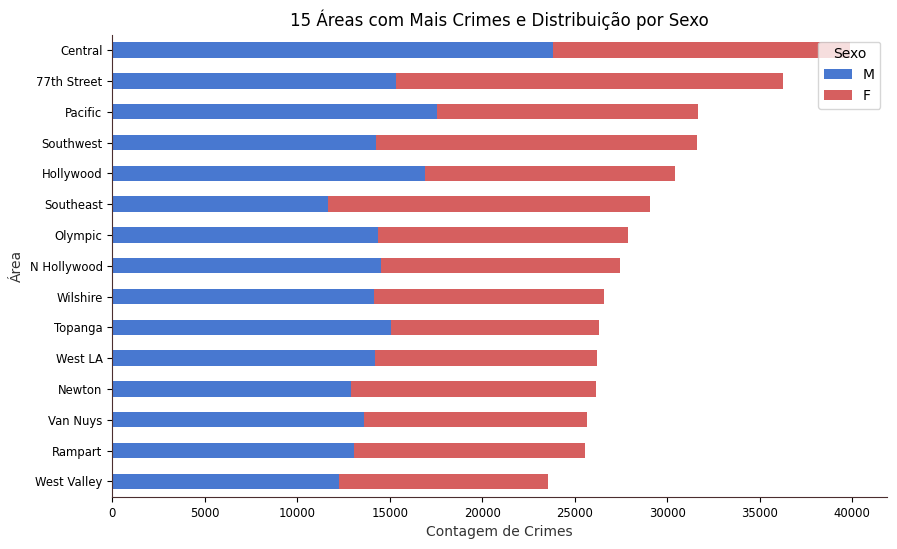

In [9]:
# 15 Áreas com Mais Crimes e Distribuição por Sexo
crime_counts = df.groupby(['AREA NAME', 'Vict Sex']).size().reset_index(name='Count')

total_crime_counts = crime_counts.groupby('AREA NAME')['Count'].sum().sort_values(ascending=False).head(15).index
filtered_crime_counts = crime_counts[crime_counts['AREA NAME'].isin(total_crime_counts)]

crime_counts_wide = filtered_crime_counts.pivot(index='AREA NAME', columns='Vict Sex', values='Count').fillna(0)
crime_counts_wide = crime_counts_wide[['M', 'F']] 

crime_counts_wide['Total'] = crime_counts_wide.sum(axis=1)
crime_counts_wide = crime_counts_wide.sort_values(by='Total', ascending=True).drop(columns='Total')

fig, ax = plt.subplots()
palette = sns.color_palette('muted')
crime_counts_wide.plot(kind='barh', stacked=True, ax=ax, color=[palette[0], palette[3]])
ax.grid(False)  
ax.set_xlabel('Contagem de Crimes')
ax.set_ylabel('Área')
plt.title('15 Áreas com Mais Crimes e Distribuição por Sexo')
plt.legend(title='Sexo', loc='upper right')
plt.show()

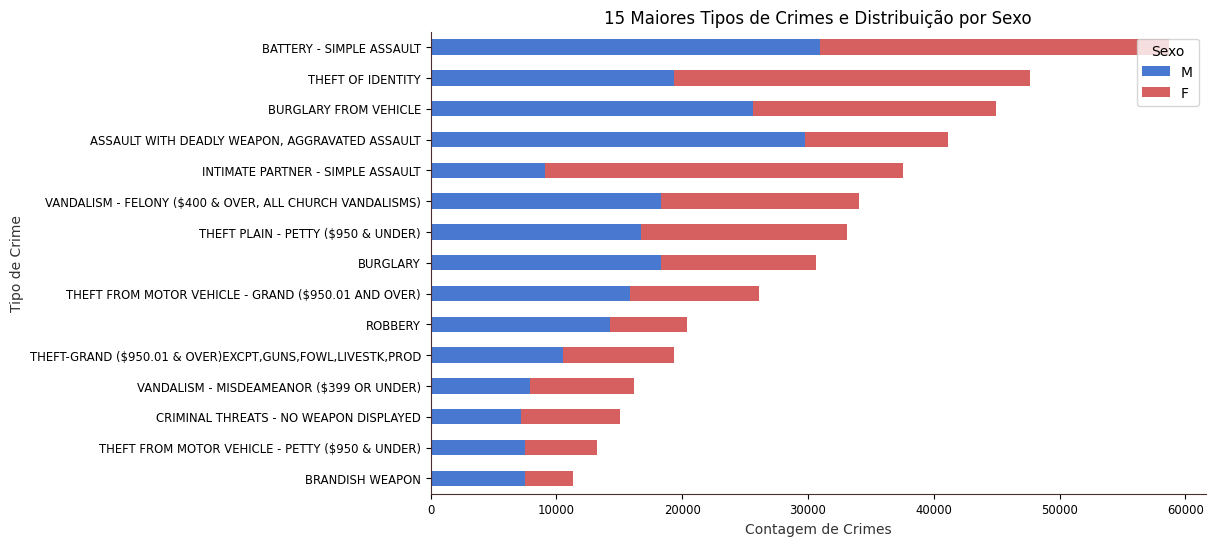

In [10]:
# 15 Maiores Tipos de Crimes e Distribuição por Sexo
crime_counts = df.groupby(['Crm Cd Desc', 'Vict Sex']).size().reset_index(name='Count')

total_crime_counts = crime_counts.groupby('Crm Cd Desc')['Count'].sum().sort_values(ascending=False).head(15).index
filtered_crime_counts = crime_counts[crime_counts['Crm Cd Desc'].isin(total_crime_counts)]

crime_counts_wide = filtered_crime_counts.pivot(index='Crm Cd Desc', columns='Vict Sex', values='Count').fillna(0)
crime_counts_wide = crime_counts_wide[['M', 'F']]  

crime_counts_wide['Total'] = crime_counts_wide.sum(axis=1)
crime_counts_wide = crime_counts_wide.sort_values(by='Total', ascending=True).drop(columns='Total')

fig, ax = plt.subplots()
palette = sns.color_palette('muted')
crime_counts_wide.plot(kind='barh', stacked=True, ax=ax, color=[palette[0], palette[3]])
ax.grid(False)  # Remove todos os grids
ax.set_xlabel('Contagem de Crimes')
ax.set_ylabel('Tipo de Crime')
plt.title('15 Maiores Tipos de Crimes e Distribuição por Sexo')
plt.legend(title='Sexo', loc='upper right')
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\2233933673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_counts_women_df, y='Crm Cd Desc', x='Count', palette='Reds_r')


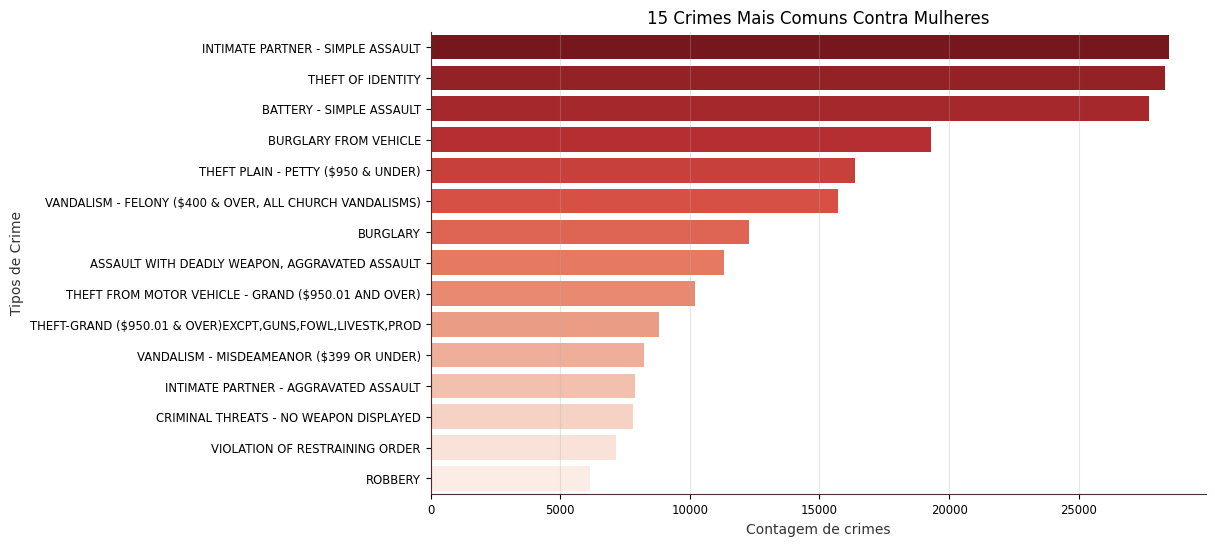

In [11]:
# 15 Crimes Mais Comuns Contra Mulheres
fig, ax = plt.subplots()
df_women = df[df['Vict Sex'] == 'F']  

crime_counts_women = df_women['Crm Cd Desc'].value_counts().head(15)
crime_counts_women_df = crime_counts_women.reset_index()
crime_counts_women_df.columns = ['Crm Cd Desc', 'Count']

sns.barplot(data=crime_counts_women_df, y='Crm Cd Desc', x='Count', palette='Reds_r')
ax.set_xlabel('Contagem de crimes')
ax.set_ylabel('Tipos de Crime')
plt.title('15 Crimes Mais Comuns Contra Mulheres')
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\2413574284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_counts_women_df, y='Crm Cd Desc', x='Count', palette='Blues_r')


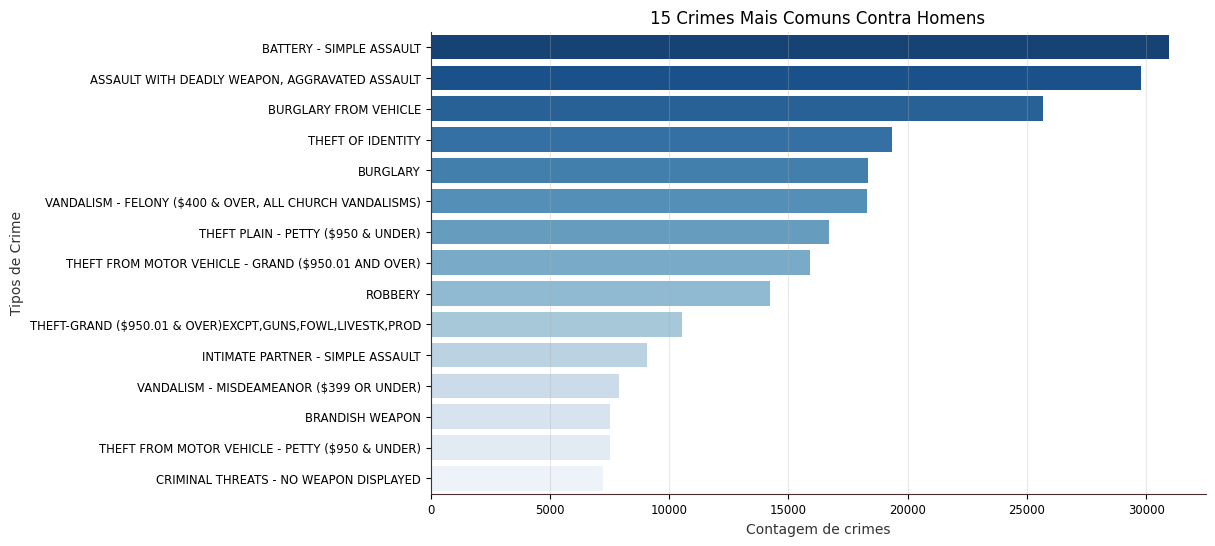

In [12]:
# 15 Crimes Mais Comuns Contra Homens
fig, ax = plt.subplots()
df_men = df[df['Vict Sex'] == 'M']  

crime_counts_women = df_men['Crm Cd Desc'].value_counts().head(15)
crime_counts_women_df = crime_counts_women.reset_index()
crime_counts_women_df.columns = ['Crm Cd Desc', 'Count']

sns.barplot(data=crime_counts_women_df, y='Crm Cd Desc', x='Count', palette='Blues_r')
ax.set_xlabel('Contagem de crimes')
ax.set_ylabel('Tipos de Crime')
plt.title('15 Crimes Mais Comuns Contra Homens')
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\3514167339.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime_counts = df_filtered.resample('M').size().reset_index(name='Count')


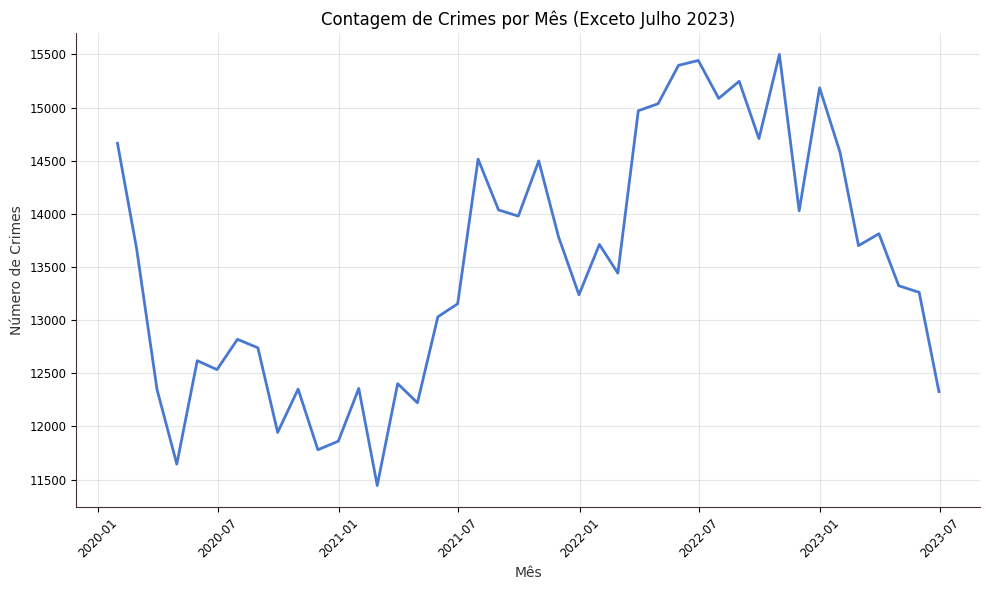

In [13]:
# Contagem de Crimes por Mês (Exceto Julho 2023)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df2 = df.dropna(subset=['DATE OCC'])
df2.set_index('DATE OCC', inplace=True)
df2['YearMonth'] = df2.index.to_period('M')

# Filtrando o DataFrame para remover o mês de julho de 2023
df_filtered = df2[df2['YearMonth'] < '2023-07']
monthly_crime_counts = df_filtered.resample('M').size().reset_index(name='Count')

sns.lineplot(data=monthly_crime_counts, x='DATE OCC', y='Count')
plt.title('Contagem de Crimes por Mês (Exceto Julho 2023)')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


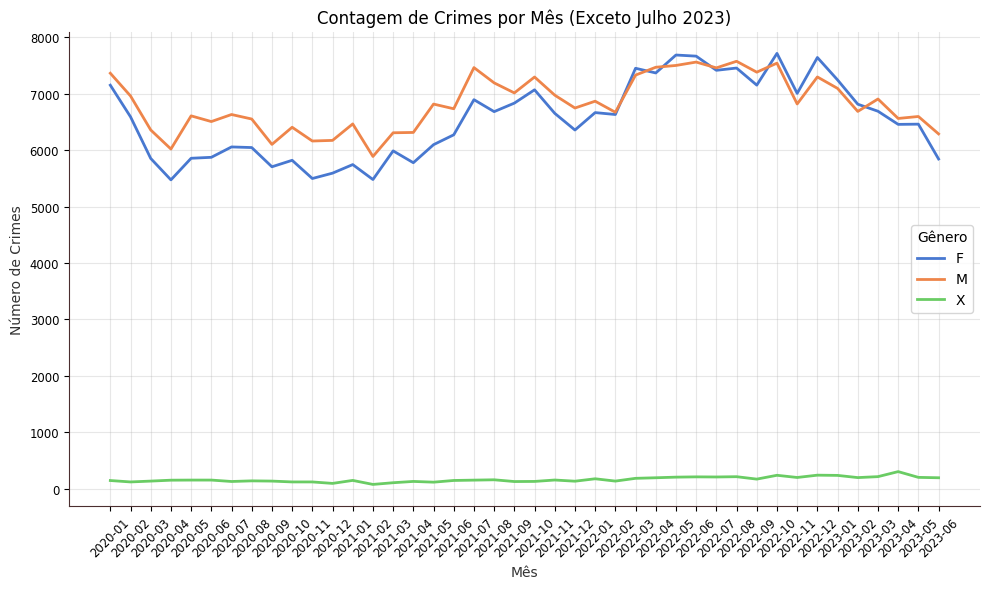

In [14]:
# Contagem de Crimes por Mês (Exceto Julho 2023)
df2 = df.dropna(subset=['DATE OCC'])
df2['YearMonth'] = df2['DATE OCC'].dt.to_period('M').astype(str)

# Filtrando o DataFrame para remover o mês de julho de 2023
df_filtered = df2[df2['DATE OCC'] < '2023-07-01']
monthly_crime_counts = df_filtered.groupby(['YearMonth', 'Vict Sex']).size().reset_index(name='Count')

sns.lineplot(data=monthly_crime_counts, x='YearMonth', y='Count', hue='Vict Sex')
plt.title('Contagem de Crimes por Mês (Exceto Julho 2023)')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gênero')
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\3028017462.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=local_crime_counts_df, y='Premis Desc', x='Count', palette=brown_palette)


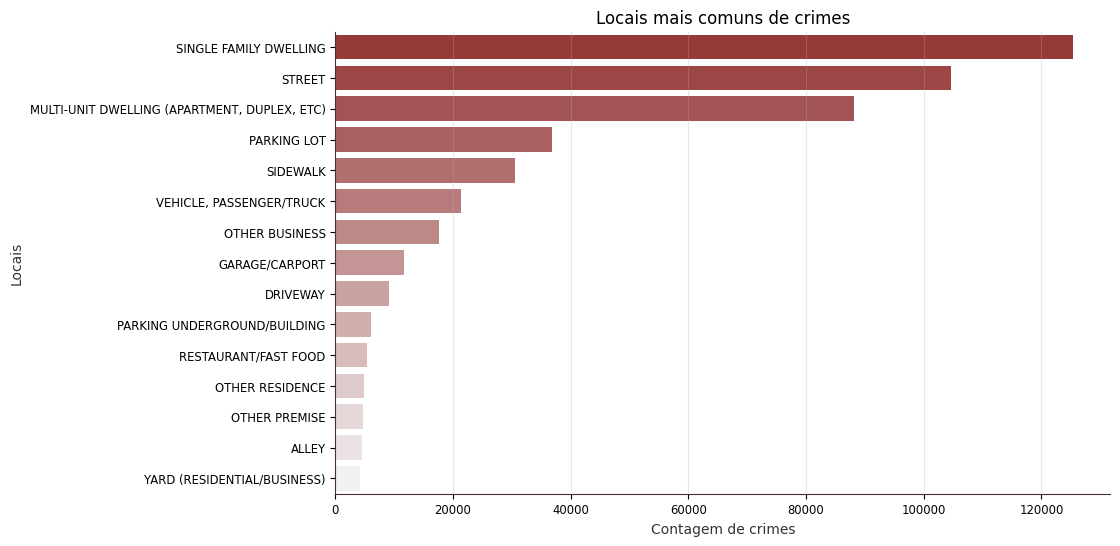

In [15]:
# Locais mais comuns de crimes (15 locais)
fig, ax = plt.subplots()
local_crime_counts = df['Premis Desc'].value_counts().head(15)
local_crime_counts_df = local_crime_counts.reset_index()
local_crime_counts_df.columns = ['Premis Desc', 'Count']  

# Definir a cor base para a paleta (marrom escuro)
base_color = "#8B4513"
brown_palette = sns.light_palette("brown", as_cmap=False, n_colors=15)
brown_palette = brown_palette[::-1]  

sns.barplot(data=local_crime_counts_df, y='Premis Desc', x='Count', palette=brown_palette)
ax.set_xlabel('Contagem de crimes')
ax.set_ylabel('Locais')
plt.title('Locais mais comuns de crimes')
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\2331429949.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='muted', ax=axes[0])
C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\2331429949.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Vict Age', data=df, palette='viridis', ax=axes[1])


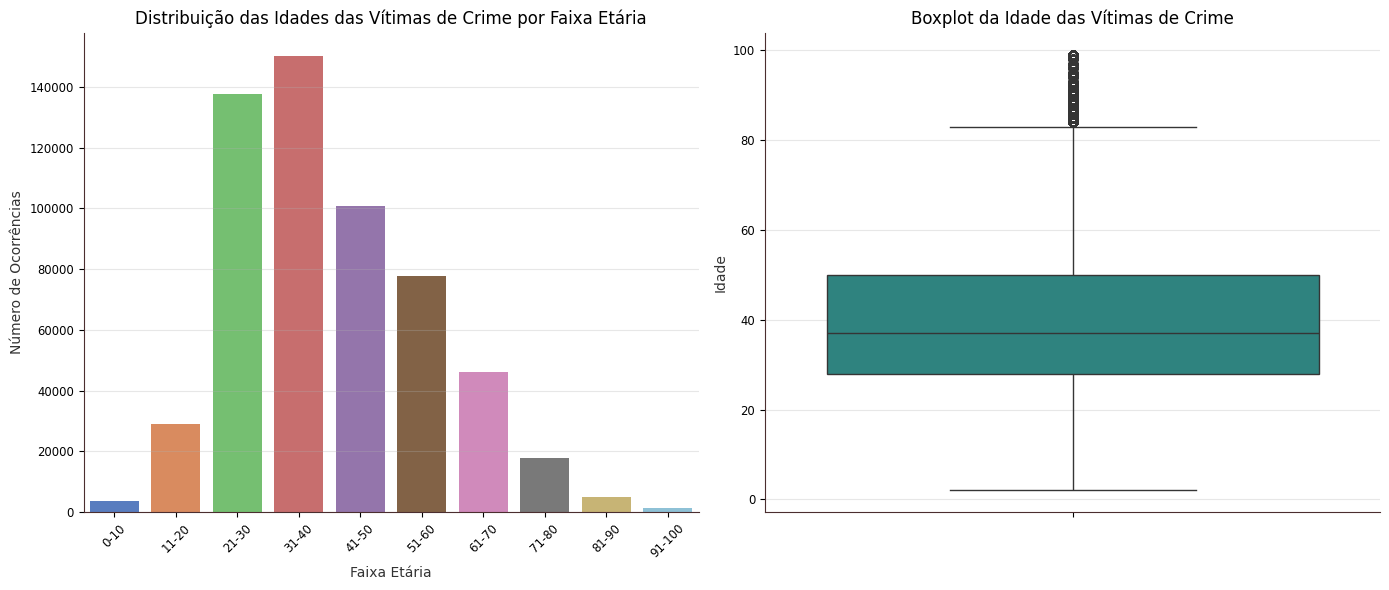

In [16]:
# Distribuição das Idades das Vítimas de Crime por Faixa Etária e Boxplot da Idade das Vítimas de Crime

# Intervalos e rótulos para as faixas etárias
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['AgeGroup'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['AgeGroup'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras da distribuição das idades
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='muted', ax=axes[0])
axes[0].set_title('Distribuição das Idades das Vítimas de Crime por Faixa Etária')
axes[0].set_xlabel('Faixa Etária')
axes[0].set_ylabel('Número de Ocorrências')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot da idade das vítimas
sns.boxplot(y='Vict Age', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Boxplot da Idade das Vítimas de Crime')
axes[1].set_ylabel('Idade')

plt.tight_layout()
plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7164\746312857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_counts_df, x='Count', y='Periodo', palette='muted')


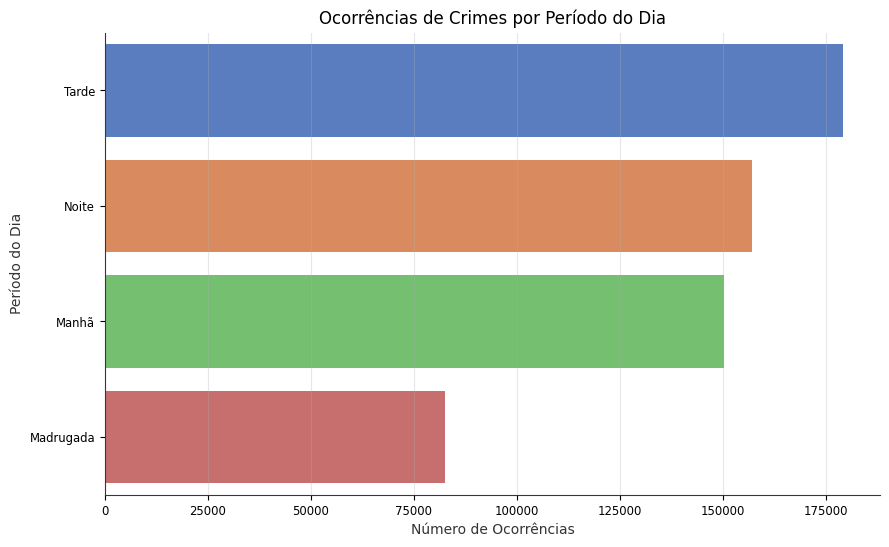

In [17]:
# Ocorrências de Crimes por Período do Dia
time_counts = df['Periodo'].value_counts()
time_counts_df = time_counts.reset_index()
time_counts_df.columns = ['Periodo', 'Count']

sns.barplot(data=time_counts_df, x='Count', y='Periodo', palette='muted')
plt.title('Ocorrências de Crimes por Período do Dia')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Período do Dia')
plt.show()